# Prediction of thermodynamic properties based on functional groups

### Step 1: Load Dataset

In [53]:
import pandas as pd
df = pd.read_csv("dataset_modified.csv")  
print(df.shape)
print(df.columns)
df.head()


(11001, 77)
Index(['index', 'smiles', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve',
       'U0', 'U', 'H', 'G', 'Cv', 'fg_Al_COO', 'fg_Al_OH', 'fg_Al_OH_noTert',
       'fg_ArN', 'fg_Ar_N', 'fg_Ar_NH', 'fg_Ar_OH', 'fg_COO', 'fg_COO2',
       'fg_C_O', 'fg_C_O_noCOO', 'fg_HOCCN', 'fg_Imine', 'fg_NH0', 'fg_NH1',
       'fg_NH2', 'fg_Ndealkylation1', 'fg_Ndealkylation2', 'fg_Nhpyrrole',
       'fg_aldehyde', 'fg_alkyl_carbamate', 'fg_alkyl_halide',
       'fg_allylic_oxid', 'fg_amide', 'fg_amidine', 'fg_aniline',
       'fg_aryl_methyl', 'fg_benzene', 'fg_bicyclic', 'fg_epoxide', 'fg_ester',
       'fg_ether', 'fg_furan', 'fg_guanido', 'fg_halogen', 'fg_imidazole',
       'fg_imide', 'fg_ketone', 'fg_ketone_Topliss', 'fg_lactam', 'fg_lactone',
       'fg_methoxy', 'fg_morpholine', 'fg_nitrile', 'fg_oxazole', 'fg_oxime',
       'fg_para_hydroxylation', 'fg_phenol', 'fg_phenol_noOrthoHbond',
       'fg_piperdine', 'fg_piperzine', 'fg_priamide', 'fg_pyridine',
       'fg_quatN', 'fg_te

,index,smiles,mu,alpha,homo,lumo,gap,r2,zpve,U0,...,fg_quatN,fg_term_acetylene,fg_tetrazole,fg_unbrch_alkane,fg_urea,n_O,n_C,n_N,n_H,n_F
0,3895,O=C1C=CON=N1,3.3067,46.55,-0.2630,-0.0607,0.2023,965.3567,0.049003,-375.430225,...,0,0,0,0,0,2,3,2,2,0
1,3896,O=C1C=NOC=N1,2.4177,46.66,-0.2701,-0.0861,0.1840,567.5171,0.055941,-375.359188,...,0,0,0,0,0,2,3,2,2,0
2,3897,O=C1C=NON=C1,0.2386,48.24,-0.2681,-0.1008,0.1674,577.0287,0.054950,-375.307060,...,0,0,0,0,0,2,3,2,2,0
3,3898,O=C1C=NON=N1,1.5473,45.28,-0.2714,-0.1200,0.1514,556.6358,0.041330,-391.337881,...,0,0,0,0,0,2,2,3,1,0
4,3899,O=C1N=CON=N1,1.7309,41.79,-0.2961,-0.0570,0.2391,913.3757,0.038631,-391.518453,...,0,0,0,0,0,2,2,3,1,0


Remove Unwanted Features

In [54]:
df = df.drop(columns=['index','smiles','mu','alpha','homo','lumo','gap','r2','zpve'])
df.head()

,U0,U,H,G,Cv,fg_Al_COO,fg_Al_OH,fg_Al_OH_noTert,fg_ArN,fg_Ar_N,...,fg_quatN,fg_term_acetylene,fg_tetrazole,fg_unbrch_alkane,fg_urea,n_O,n_C,n_N,n_H,n_F
0,-375.430225,-375.421157,-375.420213,-375.469933,24.943,0,0,0,0,2,...,0,0,0,0,0,2,3,2,2,0
1,-375.359188,-375.354066,-375.353122,-375.388412,17.987,0,0,0,0,2,...,0,0,0,0,0,2,3,2,2,0
2,-375.307060,-375.301908,-375.300964,-375.336105,18.514,0,0,0,0,2,...,0,0,0,0,0,2,3,2,2,0
3,-391.337881,-391.332272,-391.331328,-391.367925,19.012,0,0,0,0,3,...,0,0,0,0,0,2,2,3,1,0
4,-391.518453,-391.509552,-391.508608,-391.558096,23.419,0,0,0,0,3,...,0,0,0,0,0,2,2,3,1,0


In [55]:
#feature_cols = [c for c in df.columns 
#                if c.startswith("fg_")]  # adjust prefix logic
# Add number of atoms to feature cols
#atom_cols = ['n_O', 'n_C', 'n_N', 'n_H', 'n_F']
#feature_cols.extend(atom_cols)
#print(f"Total features: {len(feature_cols)}")

target_cols = ['U0','U','H','G','Cv']

feature_cols = df.drop(columns=target_cols).columns
X = df[feature_cols]
y = df[target_cols]      # or whichever property you choose

X.head()

,fg_Al_COO,fg_Al_OH,fg_Al_OH_noTert,fg_ArN,fg_Ar_N,fg_Ar_NH,fg_Ar_OH,fg_COO,fg_COO2,fg_C_O,...,fg_quatN,fg_term_acetylene,fg_tetrazole,fg_unbrch_alkane,fg_urea,n_O,n_C,n_N,n_H,n_F
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,3,2,2,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,3,2,2,0
2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,3,2,2,0
3,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,2,2,3,1,0
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,2,2,3,1,0


In [58]:
import numpy as np
import pandas as pd

# Remove Features with less correlations to target
import matplotlib.pyplot as plt

# Calculate correlation between features and targets
feature_target_corr = pd.DataFrame()

# For each target, get absolute correlation with all features
for target in target_cols:
    # Calculate correlation between each feature and this target
    feature_target_corr[target] = X.corrwith(df[target]).abs()

# Get the maximum correlation across all targets for each feature
max_corr = feature_target_corr.max(axis=1)

# Set correlation threshold
threshold = 0.1

# Select features with correlation above threshold
selected_features = max_corr[max_corr > threshold].index.tolist()
print(f"Original feature count: {len(feature_cols)}")
print(f"Features with correlation > {threshold}: {len(selected_features)}")

# Plot feature correlations sorted
#plt.figure(figsize=(10, 6))
#max_corr.sort_values(ascending=False).plot(kind='bar')
#plt.axhline(y=threshold, color='r', linestyle='--')
#plt.title(f'Maximum Absolute Correlation with Target Variables')
#plt.xlabel('Features')
#plt.ylabel('Maximum Correlation')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()

# Update X with selected features only
X_filtered = X[selected_features]
print(f"X shape after feature selection: {X_filtered.shape}")
X = X_filtered

Original feature count: 63
Features with correlation > 0.1: 44
X shape after feature selection: (11001, 44)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# Define fresh models with proper configuration
models = {
    'Ridge': Ridge(),
    'RF': RandomForestRegressor(random_state=42, n_jobs=-1),
    'SVR': MultiOutputRegressor(SVR(kernel="rbf"), n_jobs=-1)
}

for name, model in models.items():
    # — Multi‐output CV score (averaged over the targets by default) —
    cv_scores = cross_val_score(
        model,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="neg_mean_squared_error"
    )
    cv_rmse_mean = np.sqrt(-cv_scores).mean()
    cv_rmse_std  = np.sqrt(-cv_scores).std()
    print(f"{name}  CV RMSE (avg over targets): {cv_rmse_mean:.3f} ± {cv_rmse_std:.3f}")

    # Fit the model before prediction
    model.fit(X_train_scaled, y_train)
    
    # — Test‐set performance —
    y_pred = model.predict(X_test_scaled)  # shape (n_samples, n_targets)

    # 1) Overall RMSE & R² (averaged over targets)
    mse_overall = mean_squared_error(y_test, y_pred)
    rmse_overall = np.sqrt(mse_overall)
    r2_overall   = r2_score(y_test, y_pred)
    print(f"{name}  Test RMSE (avg over targets): {rmse_overall:.3f},  R² (avg): {r2_overall:.3f}")

    # 2) Per‐target metrics
    for i, target in enumerate(target_cols):
        mse_i  = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        rmse_i = np.sqrt(mse_i)
        r2_i   = r2_score(y_test.iloc[:, i], y_pred[:, i])
        print(f"   → {target:<20} RMSE: {rmse_i:.3f},  R²: {r2_i:.3f}")
    
    print()  # blank line between models


Ridge  CV RMSE (avg over targets): 0.647 ± 0.023
Ridge  Test RMSE (avg over targets): 0.617,  R² (avg): 0.974
   → U0                   RMSE: 0.265,  R²: 1.000
   → U                    RMSE: 0.265,  R²: 1.000
   → H                    RMSE: 0.265,  R²: 1.000
   → G                    RMSE: 0.266,  R²: 1.000
   → Cv                   RMSE: 1.274,  R²: 0.870

RF  CV RMSE (avg over targets): 1.596 ± 0.310
RF  Test RMSE (avg over targets): 1.050,  R² (avg): 0.975
   → U0                   RMSE: 1.002,  R²: 0.999
   → U                    RMSE: 1.002,  R²: 0.999
   → H                    RMSE: 1.002,  R²: 0.999
   → G                    RMSE: 1.002,  R²: 0.999
   → Cv                   RMSE: 1.224,  R²: 0.880

SVR  CV RMSE (avg over targets): 9.159 ± 0.511
SVR  Test RMSE (avg over targets): 8.777,  R² (avg): 0.886
   → U0                   RMSE: 9.790,  R²: 0.894
   → U                    RMSE: 9.790,  R²: 0.894
   → H                    RMSE: 9.790,  R²: 0.894
   → G                    RM

In [63]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# your wrapped multi‐output SVR
wrapped_svr = MultiOutputRegressor(SVR(kernel="rbf"), n_jobs=-1)

param_grid = {
    "estimator__C":       [0.1, 1.0, 10.0],
    "estimator__epsilon": [0.01, 0.1, 0.5]
}

halving_svr = HalvingGridSearchCV(
    wrapped_svr,
    param_grid=param_grid,
    factor=3,               # cut 2/3 of candidates each iteration
    cv=3,                   # fewer folds speeds things up
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

halving_svr.fit(X_train_scaled, y_train)
print("HalvingGridSearchCV best params:", halving_svr.best_params_)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 855
max_resources_: 7700
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 855
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 2565
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 7695
Fitting 3 folds for each of 1 candidates, totalling 3 fits
HalvingGridSearchCV best params: {'estimator__C': 10.0, 'estimator__epsilon': 0.01}


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    "n_estimators":    [50, 100, 200],
    "max_depth":       [None, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train_scaled, y_train)

print("Best RF params (grid):", grid_rf.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best RF params (grid): {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}


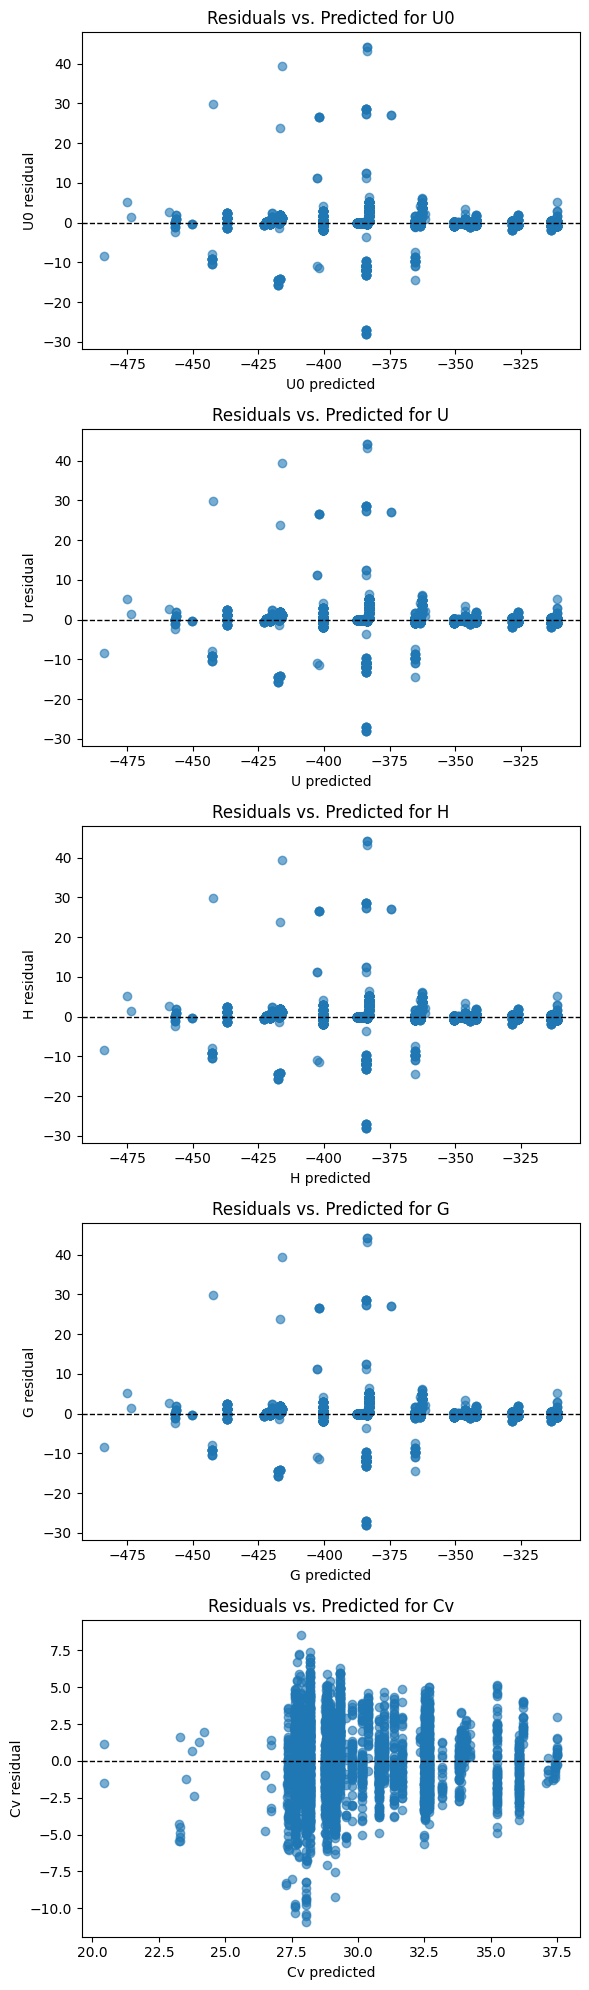

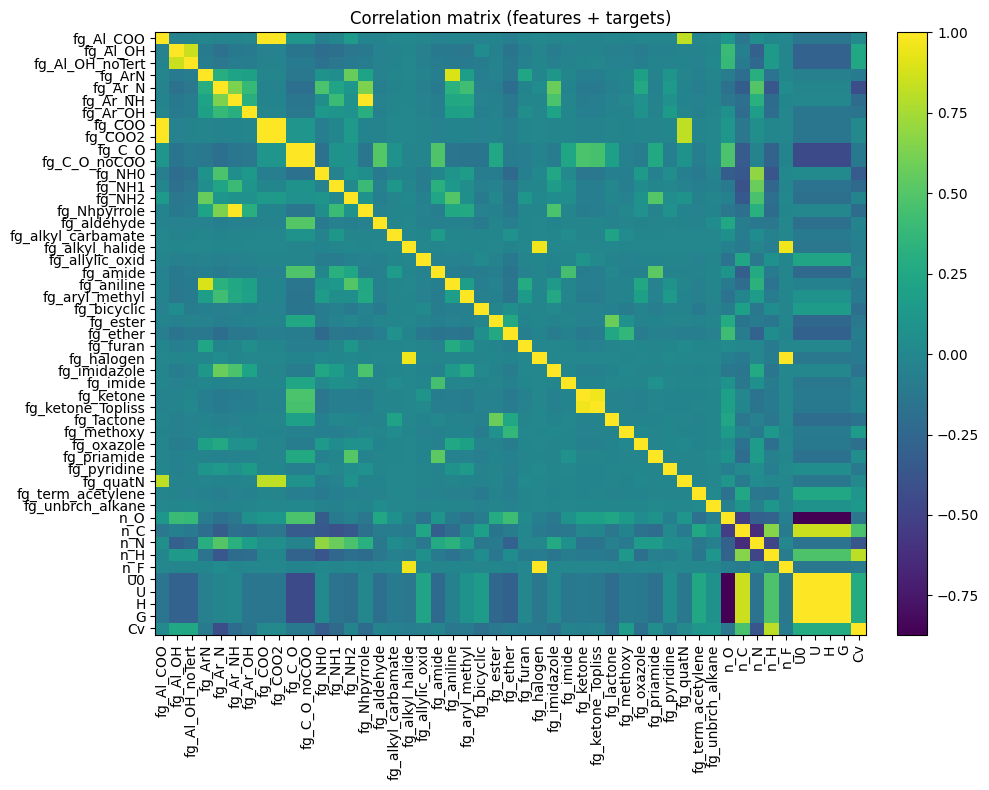

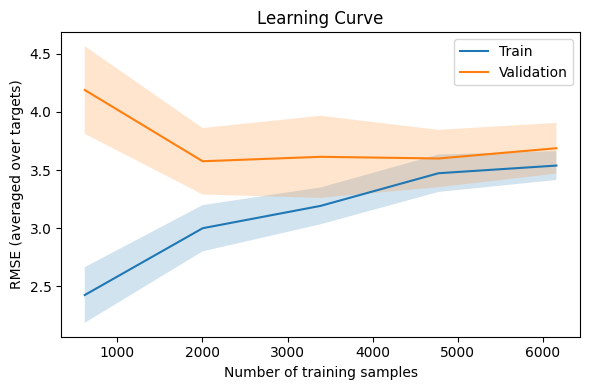

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assumptions: replace with your actual objects
# rf_best        = your tuned RandomForestRegressor (multi‐output)
# scaler         = the StandardScaler fitted on X_train
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled  = scaler.transform(X_test)
# y_train        = DataFrame of training targets
# y_test         = DataFrame of test targets

# 1) Prepare feature and target names
feature_names = list(scaler.feature_names_in_)  # names matching X_train_scaled columns
target_cols   = list(y_train.columns)           # names matching y_train columns

# -----------------------------------------------------------------------------
# 1) Residual plots in one figure with subplots
# -----------------------------------------------------------------------------
n_targets = len(target_cols)
fig, axes = plt.subplots(n_targets, 1, figsize=(6, 4 * n_targets))

y_pred = rf_best.predict(X_test_scaled)
for i, tgt in enumerate(target_cols):
    ax = axes[i] if n_targets > 1 else axes
    resid = y_test[tgt].values - y_pred[:, i]
    ax.scatter(y_pred[:, i], resid, alpha=0.6)
    ax.axhline(0, color='k', linestyle='--', linewidth=1)
    ax.set_xlabel(f"{tgt} predicted")
    ax.set_ylabel(f"{tgt} residual")
    ax.set_title(f"Residuals vs. Predicted for {tgt}")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 2) Correlation matrix heatmap
# -----------------------------------------------------------------------------
all_cols = feature_names + target_cols

df_features = pd.DataFrame(X_train_scaled, columns=feature_names).reset_index(drop=True)
df_targets  = y_train.reset_index(drop=True)
df_corr     = pd.concat([df_features, df_targets], axis=1).corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(df_corr.values, interpolation='none', aspect='auto')
ax.set_xticks(range(len(all_cols)))
ax.set_xticklabels(all_cols, rotation=90)
ax.set_yticks(range(len(all_cols)))
ax.set_yticklabels(all_cols)
ax.set_title("Correlation matrix (features + targets)")
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 3) Learning curves (overall RMSE averaged across targets)
# -----------------------------------------------------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    rf_best,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_rmse = np.sqrt(-train_scores)
val_rmse   = np.sqrt(-val_scores)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_rmse.mean(axis=1), label="Train")
plt.plot(train_sizes, val_rmse.mean(axis=1),   label="Validation")
plt.fill_between(
    train_sizes,
    train_rmse.mean(axis=1) - train_rmse.std(axis=1),
    train_rmse.mean(axis=1) + train_rmse.std(axis=1),
    alpha=0.2
)
plt.fill_between(
    train_sizes,
    val_rmse.mean(axis=1) - val_rmse.std(axis=1),
    val_rmse.mean(axis=1) + val_rmse.std(axis=1),
    alpha=0.2
)
plt.xlabel("Number of training samples")
plt.ylabel("RMSE (averaged over targets)")
plt.title("Learning Curve")
plt.legend()
plt.tight_layout()
plt.show()


#### Clustering & Classification

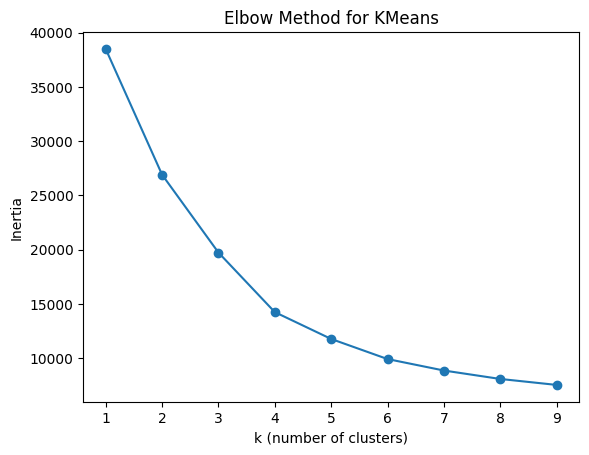

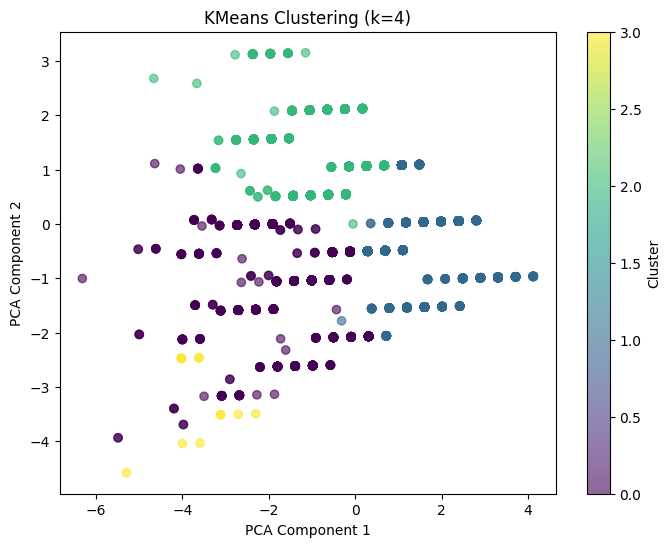

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1) Elbow plot to pick k
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10      # number of different centroid initializations
    )
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()


# 2) Fit with your chosen k (e.g. k=4)
k_opt = 4
km = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=10
)
clusters = km.fit_predict(X_train_scaled)

# 3) Visualize the clusters in 2D (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f"KMeans Clustering (k={k_opt})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


# Attach to your DataFrame
#df['cluster'] = clusters
#print(df['cluster'].value_counts())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram


# 2) Select only functional-group columns
#    e.g. if your columns are named 'fg_methyl', 'fg_hydroxyl', etc.
fg_cols = feature_cols
fg_cols = [c for c in fg_cols if c.startswith("fg_")]  # adjust prefix logic

X_fg = df[fg_cols].values

# 3) Standardize (zero mean, unit variance)
scaler = StandardScaler().fit(X_fg)
X_fg_scaled = scaler.transform(X_fg)

# 4) Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_fg_scaled)

# ————————————————————————————
# A) K-Means clustering on functional groups
# ————————————————————————————

k = 4   # choose number of clusters
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_km = km.fit_predict(X_fg_scaled)

# Plot K-Means results on PCA plane
plt.figure(figsize=(6,5))
for cluster in range(k):
    mask = (labels_km == cluster)
    plt.scatter(
        X2[mask, 0],
        X2[mask, 1],
        label=f"Cluster {cluster}",
        alpha=0.7
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (k={k}) by Functional Groups")
plt.legend()
plt.tight_layout()
plt.show()


# ————————————————————————————
# B) Hierarchical clustering and dendrogram
# ————————————————————————————

# 1) Compute the linkage matrix using Ward’s method
Z = linkage(X_fg_scaled, method="ward")

# 2) Plot the full dendrogram (no truncation)
plt.figure(figsize=(12, 4))
dendrogram(
    Z,
    labels=df.index.astype(str).tolist(),  # show original DataFrame index for each leaf
    leaf_rotation=90,
    leaf_font_size=6,
    color_threshold=None
)
plt.xlabel("Sample index")
plt.ylabel("Ward linkage distance")
plt.title("Hierarchical Clustering Dendrogram (Full)")
plt.tight_layout()
plt.show()


# 3) Optionally, cut the tree into the same k clusters
hc = AgglomerativeClustering(
    n_clusters=k,
    linkage="ward"
)
labels_hc = hc.fit_predict(X_fg_scaled)

# And plot those on the same PCA plane for comparison
plt.figure(figsize=(6,5))
for cluster in range(k):
    mask = (labels_hc == cluster)
    plt.scatter(
        X2[mask, 0],
        X2[mask, 1],
        label=f"HC Cluster {cluster}",
        alpha=0.7
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Agglomerative Clustering (k={k}) by Functional Groups")
plt.legend()
plt.tight_layout()
plt.show()
